In [1]:
import re

import numpy as np
import pandas as pd

import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('../../../input/2016 School Explorer.csv')
df2 = pd.read_csv('../../../input/D5 SHSAT Registrations and Testers.csv')

In [3]:
df1_copy = df1.copy()
df2_copy = df2.copy()

In [4]:
for col in df1_copy.columns.values:
    print col

Adjusted Grade
New?
Other Location Code in LCGMS
School Name
SED Code
Location Code
District
Latitude
Longitude
Address (Full)
City
Zip
Grades
Grade Low
Grade High
Community School?
Economic Need Index
School Income Estimate
Percent ELL
Percent Asian
Percent Black
Percent Hispanic
Percent Black / Hispanic
Percent White
Student Attendance Rate
Percent of Students Chronically Absent
Rigorous Instruction %
Rigorous Instruction Rating
Collaborative Teachers %
Collaborative Teachers Rating
Supportive Environment %
Supportive Environment Rating
Effective School Leadership %
Effective School Leadership Rating
Strong Family-Community Ties %
Strong Family-Community Ties Rating
Trust %
Trust Rating
Student Achievement Rating
Average ELA Proficiency
Average Math Proficiency
Grade 3 ELA - All Students Tested
Grade 3 ELA 4s - All Students
Grade 3 ELA 4s - American Indian or Alaska Native
Grade 3 ELA 4s - Black or African American
Grade 3 ELA 4s - Hispanic or Latino
Grade 3 ELA 4s - Asian or Pacific

In [5]:
for col in df2_copy.columns.values:
    print col

DBN
School name
Year of SHST
Grade level
Enrollment on 10/31
Number of students who registered for the SHSAT
Number of students who took the SHSAT


In [6]:
remove = ['Other Location Code in LCGMS', 'Adjusted Grade', 'New?']
df1_copy = df1_copy.drop(remove, axis = 1 )

In [7]:
df1_copy['IsCommunitySchool'] = df1_copy['Community School?'] == 'Yes'
df1_copy = df1_copy.drop(['Community School?'], axis = 1)

In [8]:
percent_pattern = r'Percent\s.*'
percent_regex = re.compile(percent_pattern, re.IGNORECASE)

for col in df1_copy.columns.values:
    if percent_regex.search(col):
        print col
        df1_copy[col] = df1_copy[col].astype(np.object).str.replace('%', '').astype(float)
df1_copy['Student Attendance Rate'] = df1_copy['Student Attendance Rate'].astype(np.object).str.replace('%', '').astype(float)
df1_copy['Percent of Students Chronically Absent'] = df1_copy['Percent of Students Chronically Absent'].astype(np.object).str.replace('%', '').astype(float)

Percent ELL
Percent Asian
Percent Black
Percent Hispanic
Percent Black / Hispanic
Percent White
Percent of Students Chronically Absent


In [9]:
df1_copy['School Name'] = df1_copy['School Name'].astype(str)
df1_copy = df1_copy[df1_copy['Grade High'] != '0K']
df1_copy['Grade High'] = df1_copy['Grade High'].astype(float)

<b> Remove the schools where highest grade taught is more than 5. This is because, SH-SAT is only for students studying in grade 8&9 

In [10]:
df1_copy = df1_copy[df1_copy['Grade High'] > 5]

<b> To derive a garding mechanism for school, we take all the paramters which specify the quality of schools.
We look at the correlation of the 6 factors based on which schools are rated. Weights for each of the factor was decided based on definitions and correlations.

In [11]:
school_rating = df1_copy[['Rigorous Instruction %',
'Collaborative Teachers %',
'Supportive Environment %',
'Effective School Leadership %',
'Strong Family-Community Ties %',
'Trust %']]

school_rating.head()

,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
3,85%,78%,82%,73%,89%,88%
8,94%,91%,85%,87%,83%,93%
10,90%,81%,91%,67%,83%,85%
11,100%,100%,99%,99%,92%,99%
12,72%,77%,77%,72%,76%,87%


In [12]:
for col in school_rating.columns.values:
    school_rating[col] = school_rating[col].astype(np.object).str.replace('%', '').astype(float)
    
school_rating.head()

/home/Abhishek/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
3,85.0,78.0,82.0,73.0,89.0,88.0
8,94.0,91.0,85.0,87.0,83.0,93.0
10,90.0,81.0,91.0,67.0,83.0,85.0
11,100.0,100.0,99.0,99.0,92.0,99.0
12,72.0,77.0,77.0,72.0,76.0,87.0


In [13]:
school_rating.dropna(inplace=True)
school_rating.corr()

/home/Abhishek/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
Rigorous Instruction %,1.000000,0.757568,0.720514,0.643093,0.540730,0.708931
Collaborative Teachers %,0.757568,1.000000,0.594114,0.915435,0.485351,0.882959
Supportive Environment %,0.720514,0.594114,1.000000,0.488354,0.581007,0.714141
Effective School Leadership %,0.643093,0.915435,0.488354,1.000000,0.444356,0.853213
Strong Family-Community Ties %,0.540730,0.485351,0.581007,0.444356,1.000000,0.588877
Trust %,0.708931,0.882959,0.714141,0.853213,0.588877,1.000000


In [14]:
school_rating.columns

Index([u'Rigorous Instruction %', u'Collaborative Teachers %',
       u'Supportive Environment %', u'Effective School Leadership %',
       u'Strong Family-Community Ties %', u'Trust %'],
      dtype='object')

In [15]:
school_rating.head()

,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
3,85.0,78.0,82.0,73.0,89.0,88.0
8,94.0,91.0,85.0,87.0,83.0,93.0
10,90.0,81.0,91.0,67.0,83.0,85.0
11,100.0,100.0,99.0,99.0,92.0,99.0
12,72.0,77.0,77.0,72.0,76.0,87.0


In [16]:
features = school_rating.iloc[:].values

In [17]:
print features

[[ 85.  78.  82.  73.  89.  88.]
 [ 94.  91.  85.  87.  83.  93.]
 [ 90.  81.  91.  67.  83.  85.]
 ..., 
 [ 93.  90.  88.  88.  88.  93.]
 [ 97.  92.  89.  84.  86.  94.]
 [ 87.  84.  84.  77.  85.  84.]]


In [18]:
from sklearn.decomposition import PCA

school_rating_pca = PCA(n_components=4)
school_rating_pca.fit(features)
school_rating_test = school_rating_pca.transform(features)

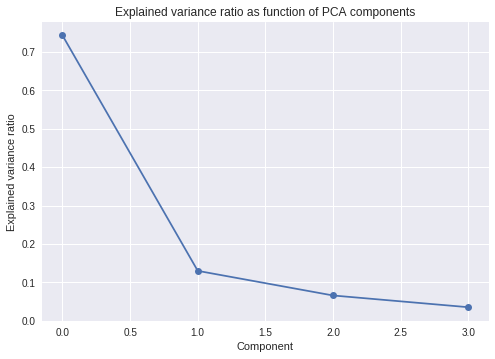

In [19]:
plt.plot(list(school_rating_pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

In [20]:
school_rating_pca = PCA(n_components=4)
reduced_features = school_rating_pca.fit_transform(features)

In [21]:
reduced_features

array([[ 10.23534017,  -9.53189697,   7.20853674,  -1.21529279],
       [ -8.39401942,   0.8386073 ,  -0.14013412,  -3.68209201],
       [ 10.77374663, -13.22318545,  -5.35775141,  -0.59775549],
       ..., 
       [-10.44417714,  -3.31565171,   2.6429648 ,  -1.78704924],
       [-10.54395711,  -4.95372754,  -2.30894538,  -3.88515507],
       [  6.30472249,  -4.90581267,   3.1092042 ,  -2.84007503]])

In [22]:
school_rating.columns

Index([u'Rigorous Instruction %', u'Collaborative Teachers %',
       u'Supportive Environment %', u'Effective School Leadership %',
       u'Strong Family-Community Ties %', u'Trust %'],
      dtype='object')

In [23]:
school_rating_3_features = school_rating[["Rigorous Instruction %","Collaborative Teachers %","Effective School Leadership %"]]

In [24]:
features_3 = school_rating_3_features.iloc[:].values

In [25]:
print features_3

[[ 85.  78.  73.]
 [ 94.  91.  87.]
 [ 90.  81.  67.]
 ..., 
 [ 93.  90.  88.]
 [ 97.  92.  84.]
 [ 87.  84.  77.]]


In [26]:
from sklearn.decomposition import PCA

school_rating_pca_3 = PCA(n_components=1)
school_rating_pca_3.fit(features_3)
school_rating_test_3 = school_rating_pca_3.transform(features_3)

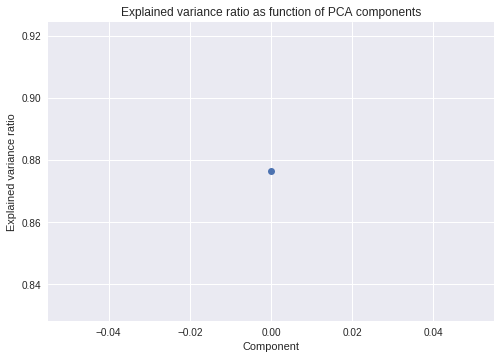

In [27]:
plt.plot(list(school_rating_pca_3.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

In [28]:
school_rating_pca_3 = PCA(n_components=1)
reduced_features_3 = school_rating_pca_3.fit_transform(features_3)

In [29]:
reduced_features_3

array([[  1.30859755e+01],
       [ -7.97821159e+00],
       [  1.36840319e+01],
       [ -2.41193760e+01],
       [  1.94147015e+01],
       [  8.47534228e+00],
       [ -1.65473029e+01],
       [  7.30065481e+00],
       [ -1.59637874e+01],
       [  3.04027409e+01],
       [ -4.54915025e+00],
       [ -1.96018931e+00],
       [ -1.51194019e+01],
       [ -9.41208335e+00],
       [ -4.75161651e+00],
       [ -1.18614930e+00],
       [ -2.31488406e+01],
       [ -1.06392038e+01],
       [ -3.24739928e+00],
       [ -1.75178383e+01],
       [ -6.23363614e+00],
       [ -1.25244702e+01],
       [ -1.60298478e+01],
       [ -2.80028972e+00],
       [  3.43611990e+01],
       [ -1.45900052e+01],
       [ -1.99162746e+01],
       [ -2.08465350e+00],
       [ -1.14294705e+01],
       [  1.25625496e+01],
       [ -1.86085528e+01],
       [  8.43239302e+00],
       [ -1.09866461e+01],
       [ -1.30478960e+01],
       [  5.17074512e+00],
       [ -1.05791142e+01],
       [  2.78094949e+01],
 

In [31]:
school_rating_3_features['Combined Feature'] = reduced_features_3

/home/Abhishek/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
school_rating_3_features.corr()

,Rigorous Instruction %,Collaborative Teachers %,Effective School Leadership %,Combined Feature
Rigorous Instruction %,1.000000,0.757568,0.643093,-0.792346
Collaborative Teachers %,0.757568,1.000000,0.915435,-0.974625
Effective School Leadership %,0.643093,0.915435,1.000000,-0.967972
Combined Feature,-0.792346,-0.974625,-0.967972,1.000000


In [41]:
mean_3 = (school_rating_3_features[["Rigorous Instruction %","Collaborative Teachers %","Effective School Leadership %"]].mean()).mean()

In [42]:
school_rating_3_features

,Rigorous Instruction %,Collaborative Teachers %,Effective School Leadership %,Combined Feature
3,85.0,78.0,73.0,13.085975
8,94.0,91.0,87.0,-7.978212
10,90.0,81.0,67.0,13.684032
11,100.0,100.0,99.0,-24.119376
12,72.0,77.0,72.0,19.414701
13,84.0,78.0,80.0,8.475342
15,92.0,96.0,96.0,-16.547303
19,79.0,87.0,77.0,7.300655
20,92.0,95.0,96.0,-15.963787
21,81.0,73.0,55.0,30.402741


In [43]:
school_rating_3_features['Adjusted Feature'] = school_rating_3_features['Combined Feature'] + mean_3

/home/Abhishek/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
school_rating_3_features

,Rigorous Instruction %,Collaborative Teachers %,Effective School Leadership %,Combined Feature,Adjusted Feature
3,85.0,78.0,73.0,13.085975,98.905330
8,94.0,91.0,87.0,-7.978212,77.841143
10,90.0,81.0,67.0,13.684032,99.503387
11,100.0,100.0,99.0,-24.119376,61.699979
12,72.0,77.0,72.0,19.414701,105.234056
13,84.0,78.0,80.0,8.475342,94.294697
15,92.0,96.0,96.0,-16.547303,69.272052
19,79.0,87.0,77.0,7.300655,93.120010
20,92.0,95.0,96.0,-15.963787,69.855567
21,81.0,73.0,55.0,30.402741,116.222096


In [45]:
school_rating_3_features.head()

,Rigorous Instruction %,Collaborative Teachers %,Effective School Leadership %,Combined Feature,Adjusted Feature
3,85.0,78.0,73.0,13.085975,98.905330
8,94.0,91.0,87.0,-7.978212,77.841143
10,90.0,81.0,67.0,13.684032,99.503387
11,100.0,100.0,99.0,-24.119376,61.699979
12,72.0,77.0,72.0,19.414701,105.234056


In [36]:
school_rating_3_features.var()

Rigorous Instruction %            43.812601
Collaborative Teachers %          65.825137
Effective School Leadership %     99.901535
Combined Feature                 183.637762
dtype: float64

In [46]:
school_rating.head()

,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
3,85.0,78.0,82.0,73.0,89.0,88.0
8,94.0,91.0,85.0,87.0,83.0,93.0
10,90.0,81.0,91.0,67.0,83.0,85.0
11,100.0,100.0,99.0,99.0,92.0,99.0
12,72.0,77.0,77.0,72.0,76.0,87.0


In [47]:
school_rating["Adjusted PCA Feature"] = school_rating_3_features['Adjusted Feature']

/home/Abhishek/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<b> Weights to each factor </b>

<br>1.0 Supportive Environment % (Supportive Environment Rating)
<br>0.8 Rigorous Instruction % (Rigorous Instruction Rating)
<br>0.7 Effective School Leadership % (Effective School Leadership Rating)
<br>0.5 Strong Family-Community Ties % (Strong Family-Community Ties Rating)

<br>Collaborative Teachers % (Collaborative Teachers Rating)
<br>Trust % (Trust Rating)

In [48]:
school_rating['SPI'] = 0.7 * school_rating['Effective School Leadership %'] + 0.8 * school_rating['Adjusted PCA Feature'] + school_rating['Supportive Environment %']+ 0.5 * school_rating['Strong Family-Community Ties %']

/home/Abhishek/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
school_rating['Location Code'] = df1_copy.loc[school_rating.index, 'Location Code']
school_rating['School Name'] = df1_copy.loc[school_rating.index, 'School Name']
school_rating['SED Code'] = df1_copy.loc[school_rating.index, 'SED Code']
school_rating['City'] = df1_copy.loc[school_rating.index, 'City']
school_rating['District'] = df1_copy.loc[school_rating.index, 'District']

/home/Abhishek/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/Abhishek/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/Abhishek/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

In [51]:
school_rating.columns.values

array(['Rigorous Instruction %', 'Collaborative Teachers %',
       'Supportive Environment %', 'Effective School Leadership %',
       'Strong Family-Community Ties %', 'Trust %', 'Adjusted PCA Feature',
       'SPI', 'Location Code', 'School Name', 'SED Code', 'City',
       'District'], dtype=object)

In [52]:
school_rating.boxplot(column='SPI')

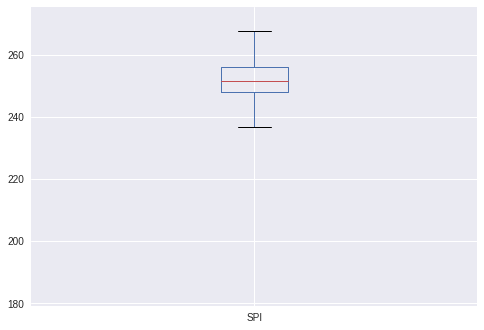

In [54]:
plt.show()

In [55]:
school_rating['SPI'].head()

3     256.724264
8     249.672915
10    259.002709
11    263.659983
12    249.587245
Name: SPI, dtype: float64

In [58]:
school_rating.sort_values('SPI',ascending=False, inplace=True)

/home/Abhishek/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [59]:
len(school_rating)

620

In [60]:
school_rating_last_quartile = school_rating[-155:]

In [61]:
len(school_rating_last_quartile)

155

In [62]:
school_rating_last_quartile.columns

Index([u'Rigorous Instruction %', u'Collaborative Teachers %',
       u'Supportive Environment %', u'Effective School Leadership %',
       u'Strong Family-Community Ties %', u'Trust %', u'Adjusted PCA Feature',
       u'SPI', u'Location Code', u'School Name', u'SED Code', u'City',
       u'District'],
      dtype='object')

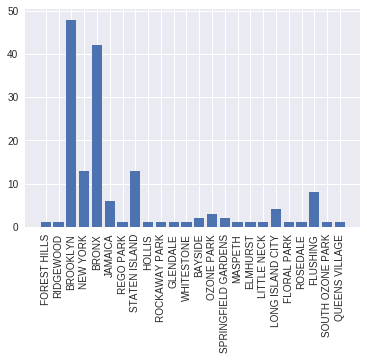

In [63]:
from collections import Counter

school_rating_last_quartile[['City']]

# Read CSV file, get author names and counts.

counter = Counter(school_rating_last_quartile['City'])
city = counter.keys()
city_count = counter.values()

# Plot histogram using matplotlib bar().
plt.figure(figsize=[6,4])
indexes = np.arange(len(city))
plt.bar(indexes, city_count)
plt.xticks(indexes , city, rotation=90)
plt.show()

<b> Look at the lowest quartile of SPI. Analyse these schools

In [ ]:
poor_schools = school_rating[school_rating['SPI'] < 243.55]
print "Number of poor schools: " + str(len(poor_schools))

poor_schools_sorted = poor_schools.sort_values('SPI')

poor_schools_sorted.head()

In [ ]:
index_list = list(poor_schools.index)
print index_list
poor_schools_details_temp = df1_copy.loc[df1_copy.index.isin(index_list)]
poor_schools_details_temp.tail()
print poor_schools_details_temp.index

In [ ]:
school_map = folium.Map([df1_copy['Latitude'].mean(), df1_copy['Longitude'].mean()], 
                        zoom_start=11,
                        tiles='Stamen Terrain') 
for index in poor_schools_details_temp.index:
    row = df1_copy.loc[index]   
#     school_name = "".join([i for i in row['School Name'] if ord(i) < 128]).replace("'", "")
    school_name = str(row['School Income Estimate'])
    
    color = 'blue'
#     print school_name
    folium.Marker([row['Latitude'], row['Longitude']], popup=school_name, icon=folium.Icon(color=color)).add_to(school_map)

school_map

## Analyse the registrations and test takers in schools that are performing poorly

In [ ]:
poor_school_names = poor_schools_details_temp['Location Code']
shsat_school_names = df2_copy['DBN']

In [ ]:
poor_intersection_list =  list(set(poor_school_names).intersection(set(shsat_school_names)))

In [ ]:
(df2_copy.loc[df2_copy['DBN'].isin(poor_intersection_list)]).groupby(["DBN","Year of SHST"])["Number of students who registered for the SHSAT","Number of students who took the SHSAT"].sum()

In [ ]:
all_schools = df1_copy['Location Code']
shsat_school = df2_copy['DBN']
print len((set(all_schools)).intersection(set(shsat_school)))

print len(set(all_schools))
print len(set(shsat_school))

<b> The schools with NaN data for quality analysis, have low percent of white students and high percentage of black students

<b> Percentage analysis of students who took SHSAT for all schools 

In [ ]:
df2_copy['Took Percentage'] = df2_copy['Number of students who took the SHSAT'] / df2_copy['Number of students who registered for the SHSAT']

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 18))
sns.barplot(x='School name', y='Number of students who registered for the SHSAT', data=df2_copy, ax=ax[0])
sns.barplot(x='School name', y='Number of students who took the SHSAT', data=df2_copy, ax=ax[1])

for ax in fig.axes[:-1]:
    plt.sca(ax)
    plt.xticks([])
plt.sca(fig.axes[-1])
plt.xticks(rotation=90)

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
sns.barplot(x='School name', y='Took Percentage', data=df2_copy, ax=ax)
plt.xticks(rotation=90)